In [3]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
from wav import Wav
import matplotlib.pyplot as plt

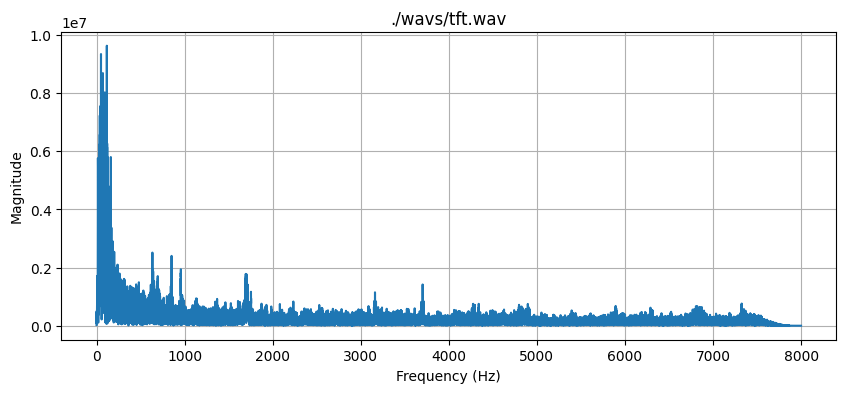

In [16]:
file_path = "./wavs/tft.wav"
N = 63
window = 'hamming'
wav_original = Wav(file_path=file_path)
def plot_frequency(wav:Wav):
    # Take the absolute value of the FFT result
    # print(np.fft.fft(wav.audio_data).shape) # this is a (85333,) element 1 dim array, containing all complex number
    fft_result = np.abs(np.fft.fft(wav.audio_data)) # by taking the absolute value, you are calculating the (a^2+b^2)^1/2 of each of that complex number
    print(fft_result)
    # Create frequency axis
    freq_axis = np.fft.fftfreq(len(fft_result), 1/wav.sample_rate) # freq_axis also have shape (85333,) 
                                                                   # wav.sample_rate for this particular wav file is 16000
                                                                   # 1/wav.sample_rate is the timestep
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(freq_axis[:len(freq_axis)//2], fft_result[:len(freq_axis)//2])
    plt.title('Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(wav.file_path)
    plt.grid(True)
    plt.show()
plot_frequency(wav_original)


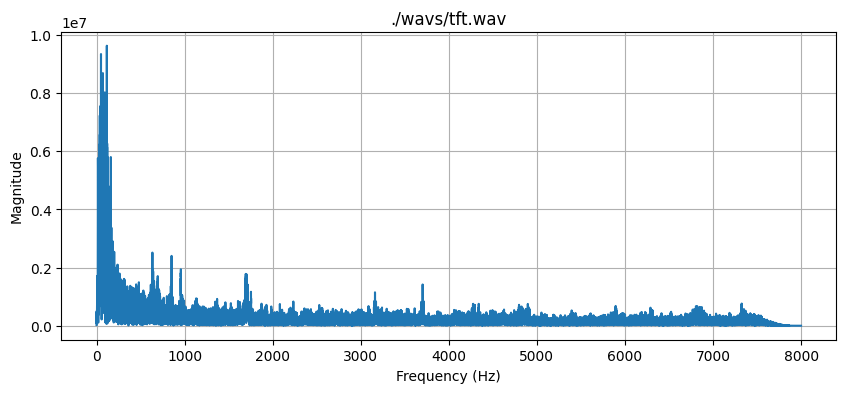

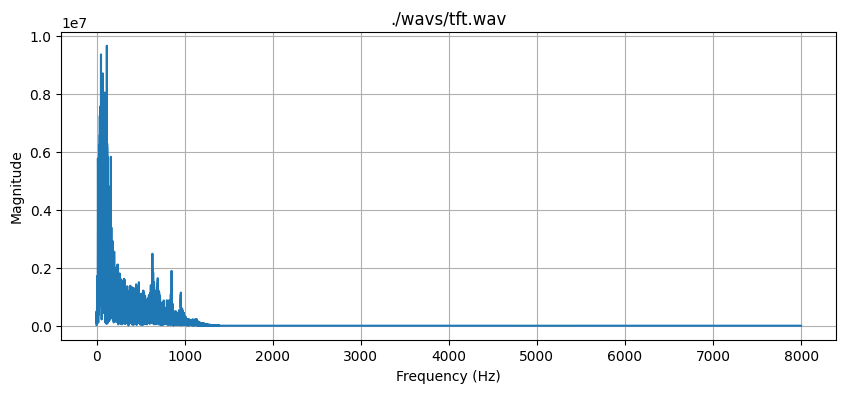

In [4]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
from freq_spec import plot_frequency_spectrum
from fir import lpf, hpf, bpf, plot_frequency_response
from wav import Wav


file_path = "./wavs/tft.wav"
# LPF + HPF + BPF
N = 63
window = 'hamming'

save_path = "./wavs/lpf_hpf_filtered_tft.wav"
# LPF
wav_lpf = Wav(file_path=file_path)
# Before filtering
plot_frequency_spectrum(wav_lpf)

h_lpf = lpf(N=N, fl=1000, fs=wav_lpf.sample_rate, window=window)
wav_lpf.apply_filter(hn=h_lpf)
plot_frequency_spectrum(wav=wav_lpf)
# BPF
# for i in range(1, 7):
#     if i in [1, 6]:
#         continue
#     wav_bpf = Wav(file_path=file_path)
#     h_bpf = bpf(N=N, fl=i*1000, fh=(i+1)*1000, fs=wav_lpf.sample_rate, window=window)
#     # Combine effect to wav_lpf
#     wav_bpf.apply_filter(hn=h_bpf)
#     wav_lpf.combine_wav(wav_bpf)
#     # HPF
#     wav_hpf = Wav(file_path=file_path)
#     h_hpf = hpf(N=N, fh=7000, fs=wav_hpf.sample_rate, window=window)
#     wav_hpf.apply_filter(hn=h_hpf)
#     # Combine effect to wav_lpf
#     wav_lpf.combine_wav(wav_hpf)
#     # Plot combined fir filters for 8 bands
#     plot_frequency_spectrum(wav_lpf)